In [1]:
# Importing relevant libraries
# These libraries will help us in vizualization, making dataframes, numerical calculations, etc.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
# As we are working on Iris dataset we will load it for our use
iris1 = datasets.load_iris()
# Making a dataframe
iris_df1 = pd.DataFrame(iris1.data, columns = iris1.feature_names)
# We can se column headings and the first 5 observation
iris_df1.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


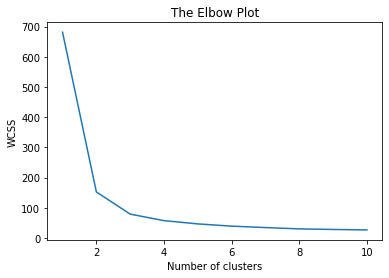

In [6]:
# Now in K-Means clustering we have to make optimum number of clustres
# We have to determine the vaule of k for which we use 'elbow plot'
# we can vizualise the 'elbow plot' on a simple line graph where we can see the elbow
# And from there we can determine the value of number of clusters
x = iris_df1.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Now we will plot a simple line graph 
# that will help us in finding the value of number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()
# We can see from the 'elbow plot' below that the optimum value of clusters is 3, 
# as(WCSS) doesn't decrease significantly with every iteration.

In [7]:
# Using the K means clustering on the data, number of clusters is 3 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

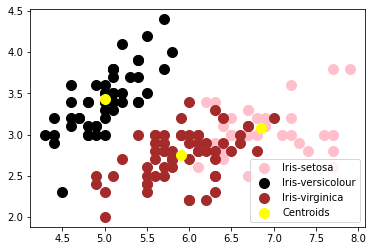

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'Pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'Black', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'Brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()